In [1]:
import os
import time
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

## load data

In [2]:
X_train= np.load("./array/X_train.npy")
y_train= np.load("./array/y_train.npy")
X_test= np.load("./array/X_test.npy")
y_test= np.load("./array/y_test.npy")

## check shape

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5214, 224, 224, 1)
(5214,)
(624, 224, 224, 1)
(624,)


## build model

In [4]:
with tf.device('/device:GPU:0'):
    model= keras.applications.resnet50.ResNet50(weights= None, classes= 2, input_shape= (224, 224, 1))

In [5]:
    model.compile(loss= "sparse_categorical_crossentropy", optimizer= "sgd", metrics= ["accuracy"])

In [6]:
    model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
    start_time= time.time()
    history= model.fit(X_train, y_train, epochs= 50, batch_size= 16)#, validation_data= (X_val, y_val))
    end_time= time.time()
print("time: ", end_time- start_time)

Epoch 1/50
326/326 [==============================] - 68s 207ms/step - loss: 0.6528 - accuracy: 0.8295
Epoch 2/50
326/326 [==============================] - 67s 205ms/step - loss: 0.2569 - accuracy: 0.9241
Epoch 3/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1921 - accuracy: 0.9346
Epoch 4/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1443 - accuracy: 0.9519
Epoch 5/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1403 - accuracy: 0.9522
Epoch 6/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1205 - accuracy: 0.9586
Epoch 7/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1155 - accuracy: 0.9591
Epoch 8/50
326/326 [==============================] - 67s 205ms/step - loss: 0.1078 - accuracy: 0.9614
Epoch 9/50
326/326 [==============================] - 67s 205ms/step - loss: 0.0863 - accuracy: 0.9718
Epoch 10/50
326/326 [==============================] - 67s 205ms/step - l

## save model

In [8]:
model.save("./model/PneumoniaTest_ResNet50_50epoch")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model/PneumoniaTest_ResNet50_50epoch\assets


## learning model

In [9]:
model= load_model("./model/PneumoniaTest_ResNet50_50epoch")

## check loss and accuracy

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

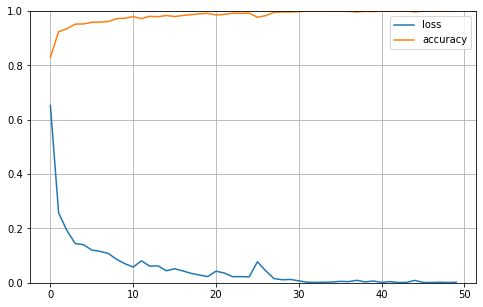

In [11]:
pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## check with test data

In [12]:
y_pred= model.predict(X_test)

y_hat=[]

for i in y_pred:
    if (i[0]> i[1]):
        y_hat.append(0)
    else:
        y_hat.append(1)


In [13]:
y_test

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,

## check accuracy

In [14]:
accuracy= 0

for i in range(len(y_test)):
    if(y_test[i]== y_hat[i]):
        accuracy+= 1
        
print("accuracy: ", accuracy/len(y_test))

accuracy:  0.7772435897435898


## load val data

In [15]:
X_val= np.load("./array/X_val.npy")
y_val= np.load("./array/y_val.npy")

In [16]:
y_val_pred= model.predict(X_val)

y_val_hat= []

for i in y_val_pred:
    if (i[0]> i[1]):
        y_val_hat.append(0)
    else:
        y_val_hat.append(1)

In [17]:
accuracy= 0

for i in range(len(y_val)):
    if(y_val[i]== y_val_hat[i]):
        accuracy+= 1
        
print("accuracy: ", accuracy/len(y_val))

accuracy:  0.625
